In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
import os

In [6]:
def load_config(yaml_path="P4-config.yaml"):
    with open(yaml_path, "r", encoding="utf-8") as f:
        return yaml.safe_load(f)
    
config = load_config()

In [10]:
deepseek_output_path = config["output_file_paths"]["deepseek_ratings_output_dir"]
o4_mini_output_path =  config["output_file_paths"]["chatgpt_ratings_output_dir"]

o4_mini_basic_path = os.path.join(o4_mini_output_path, "basic_realworld_test")
o4_mini_basic = pd.read_csv(os.path.join(o4_mini_basic_path, "chatgpt_ratings_basic_realworld_test.csv"))
deepseek_basic_path = os.path.join(deepseek_output_path, "basic_realworld_test")
deepseek_basic = pd.read_csv(os.path.join(deepseek_basic_path, "deepseek_ratings_basic_realworld_test.csv"))

o4_mini_oncology_path = os.path.join(o4_mini_output_path, "onco_realworld_test")
o4_mini_onco = pd.read_csv(os.path.join(o4_mini_oncology_path, "chatgpt_ratings_onco_realworld_test.csv"))
deepseek_onco_path = os.path.join(deepseek_output_path, "onco_realworld_test")
deepseek_onco = pd.read_csv(os.path.join(deepseek_onco_path, "deepseek_ratings_onco_realworld_test.csv"))

o4_mini_reviewer_path = os.path.join(o4_mini_output_path, "reviewer_realworld_test")
o4_mini_reviewer = pd.read_csv(os.path.join(o4_mini_reviewer_path, "chatgpt_ratings_reviewer_realworld_test.csv"))
deepseek_reviewer_path = os.path.join(deepseek_output_path, "reviewer_realworld_test")
deepseek_reviewer = pd.read_csv(os.path.join(deepseek_reviewer_path, "deepseek_ratings_reviewer_realworld_test.csv"))


In [26]:
o4_mini_basic.head()

,record_id,Drug,Summary,accurate,organized,comprehensible,succinct
0,0,Metformin,"{\n ""Mechanism"": ""Metformin is an oral anti-h...",5,5,4,2
1,1,Pioglitazone,"<Output>\n{\n ""Mechanism"": ""Pioglitazone is a...",5,5,5,4
2,2,Alogliptin,"<Output>\n{\n ""Mechanism"": ""Alogliptin is a D...",5,5,5,4
3,3,Linagliptin,"<Output>\n{\n ""Mechanism"": ""Linagliptin is a ...",2,5,4,3
4,4,Sitagliptin,"{\n ""Mechanism"": ""Sitagliptin is a DPP-4 inhi...",5,5,5,3


## Simple statistics

In [16]:
def get_stats(df):
    categories = ["accurate", "organized", "comprehensible", "succinct"]

    stats_df = pd.DataFrame({
        "average": df[categories].mean(),
        "median": df[categories].median(),
        "std_dev": df[categories].std()
    })

    return stats_df


In [35]:
def compare(o4_df, deep_df):
    o4_stats = get_stats(o4_df)
    deep_stats = get_stats(deep_df)
    merged = pd.concat({"o4_mini": o4_stats["average"],
                        "deepseek": deep_stats["average"]}, axis=1)
    return merged

basic_compare = compare(o4_mini_basic, deepseek_basic)
onco_compare = compare(o4_mini_onco, deepseek_onco)
reviewer_compare = compare(o4_mini_reviewer, deepseek_reviewer)


In [36]:
print("Basic compare:")
print(basic_compare)

print("\nOncology compare:")
print(onco_compare)

print("\nReviewer compare:")
print(reviewer_compare)


Basic compare:
                 o4_mini  deepseek
accurate        3.827586      3.75
organized       4.793103      5.00
comprehensible  4.482759      5.00
succinct        3.275862      4.50

Oncology compare:
                 o4_mini  deepseek
accurate        3.655172     3.750
organized       5.000000     5.000
comprehensible  4.724138     5.000
succinct        3.655172     4.625

Reviewer compare:
                 o4_mini  deepseek
accurate        4.142857       4.6
organized       5.000000       4.6
comprehensible  4.714286       4.8
succinct        3.285714       3.8


In [39]:
# find outliers
def find_outliers(df):
    categories = ["accurate", "organized", "comprehensible", "succinct"]
    
    # store all outlier drug names
    all_outliers = set()

    for category in categories:
        mean = df[category].mean()
        std_dev = df[category].std()
        threshold = mean - 2 * std_dev

        # find drugs below threshold
        outliers = df[df[category] < threshold]["Drug"].tolist()

        # add them to the global set of outliers
        all_outliers.update(outliers)

    return list(all_outliers)


basic_o4_outliers = find_outliers(o4_mini_basic)
basic_deep_outliers = find_outliers(deepseek_basic)

onco_o4_outliers = find_outliers(o4_mini_onco)
onco_deep_outliers = find_outliers(deepseek_onco)

reviewer_o4_outliers = find_outliers(o4_mini_reviewer)
reviewer_deep_outliers = find_outliers(deepseek_reviewer)




In [40]:
print(basic_o4_outliers)
print(basic_deep_outliers)
print(onco_o4_outliers)
print(onco_deep_outliers)
print(reviewer_o4_outliers)
print(reviewer_deep_outliers)

['Exenatide', 'Empagliflozin']
[]
[]
['Lorazepam']
['Alprazolam', 'Dapagliflozin', 'Escitalopram']
[]


In [41]:
basic_o4_mini_stats = get_stats(o4_mini_basic)
basic_deepseek_stats = get_stats(deepseek_basic)
onco_o4_mini_stats = get_stats(o4_mini_onco)
onco_deepseek_stats = get_stats(deepseek_onco)
reviewer_o4_mini_stats = get_stats(o4_mini_reviewer)
reviewer_deepseek_stats = get_stats(deepseek_reviewer)

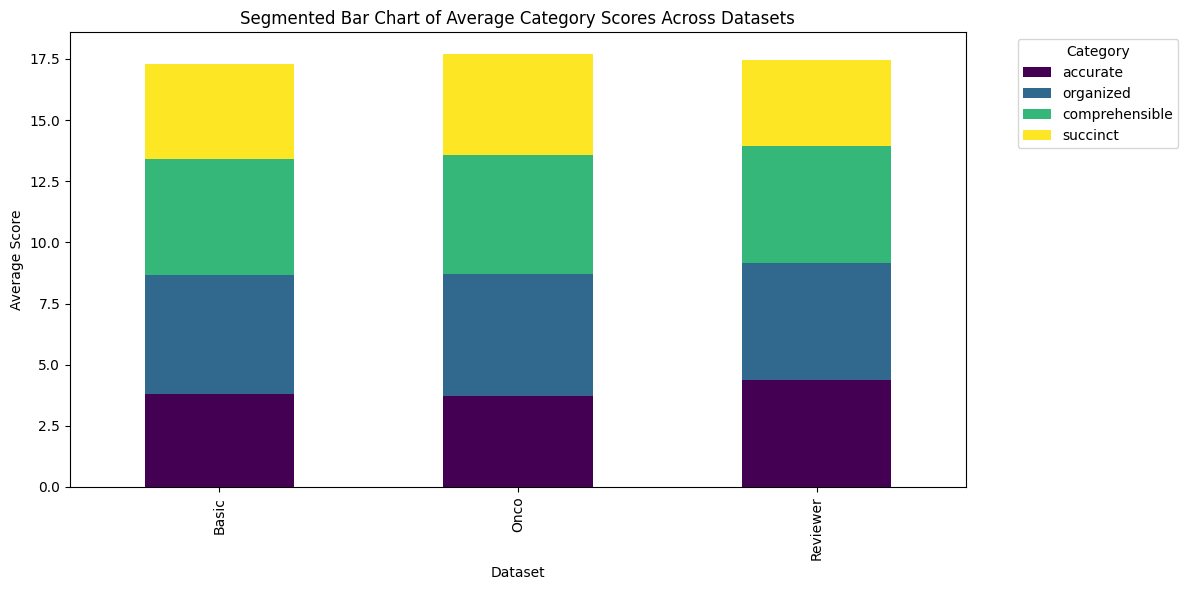

In [43]:
def combine_dataset_stats(o4_stats, deep_stats):
    """Average the two models so dataset-level difficulty is shown."""
    return (o4_stats["average"] + deep_stats["average"]) / 2

basic_avg = combine_dataset_stats(basic_o4_mini_stats, basic_deepseek_stats)
onco_avg = combine_dataset_stats(onco_o4_mini_stats, onco_deepseek_stats)
reviewer_avg = combine_dataset_stats(reviewer_o4_mini_stats, reviewer_deepseek_stats)

segment_df = pd.DataFrame({
    "Basic": basic_avg,
    "Onco": onco_avg,
    "Reviewer": reviewer_avg
}).T  # transpose → rows = datasets

segment_df.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="viridis"
)

plt.title("Segmented Bar Chart of Average Category Scores Across Datasets")
plt.ylabel("Average Score")
plt.xlabel("Dataset")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

